In [1]:
#https://www.kaggle.com/c/home-credit-default-risk
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("application_train.csv")

In [3]:
test = pd.read_csv('application_test.csv')

In [4]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (307511, 122)
Test shape: (48744, 121)


In [5]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


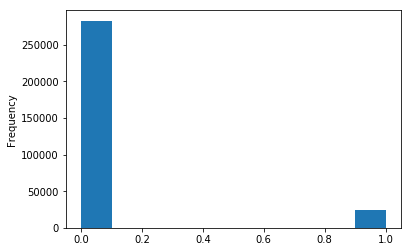

In [6]:
train.TARGET.plot.hist()

In [7]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [8]:
permissing = (train.isnull().sum() / len(train)) * 100
nadata = permissing.drop(permissing[permissing == 0].index).sort_values(ascending=False)[:30]
nullvalues = pd.DataFrame({'Missing Ratio' :nadata})
print(nullvalues)

                          Missing Ratio
COMMONAREA_MEDI               69.872297
COMMONAREA_AVG                69.872297
COMMONAREA_MODE               69.872297
NONLIVINGAPARTMENTS_AVG       69.432963
NONLIVINGAPARTMENTS_MODE      69.432963
NONLIVINGAPARTMENTS_MEDI      69.432963
FONDKAPREMONT_MODE            68.386172
LIVINGAPARTMENTS_AVG          68.354953
LIVINGAPARTMENTS_MEDI         68.354953
LIVINGAPARTMENTS_MODE         68.354953
FLOORSMIN_AVG                 67.848630
FLOORSMIN_MEDI                67.848630
FLOORSMIN_MODE                67.848630
YEARS_BUILD_AVG               66.497784
YEARS_BUILD_MEDI              66.497784
YEARS_BUILD_MODE              66.497784
OWN_CAR_AGE                   65.990810
LANDAREA_AVG                  59.376738
LANDAREA_MEDI                 59.376738
LANDAREA_MODE                 59.376738
BASEMENTAREA_MODE             58.515956
BASEMENTAREA_AVG              58.515956
BASEMENTAREA_MEDI             58.515956
EXT_SOURCE_1                  56.381073


In [9]:
train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


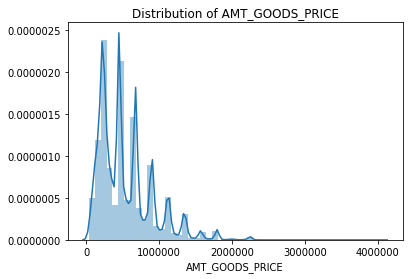

In [10]:
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(train["AMT_GOODS_PRICE"].dropna())

([array([1.0276e+04, 1.0289e+04, 2.9390e+03, 1.0590e+03, 2.2100e+02,
         2.6000e+01, 1.2000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
  array([1.25018e+05, 1.12767e+05, 4.46440e+04, 1.87860e+04, 4.85000e+03,
         1.03000e+03, 3.73000e+02, 2.30000e+01, 8.00000e+00, 1.20000e+01])],
 array([  45000.,  445500.,  846000., 1246500., 1647000., 2047500.,
        2448000., 2848500., 3249000., 3649500., 4050000.]),
 <a list of 2 Lists of Patches objects>)

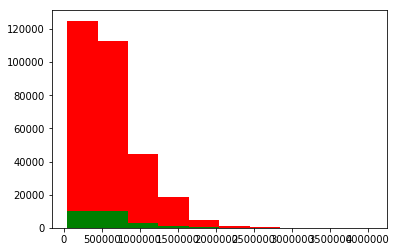

In [11]:
plt.hist([train[train['TARGET'] == 1]['AMT_CREDIT'], train[train['TARGET'] == 0]['AMT_CREDIT']],  stacked=True, color = ['g','r'])

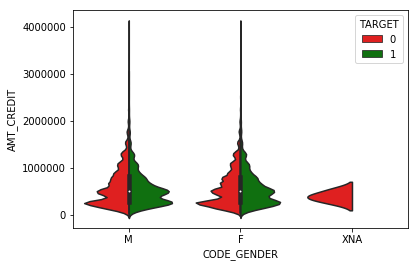

In [12]:
sns.violinplot(x='CODE_GENDER', y='AMT_CREDIT', 
               hue='TARGET', data=train, 
               split=True,
               palette={0: "r", 1: "g"}, dropna= True
              );

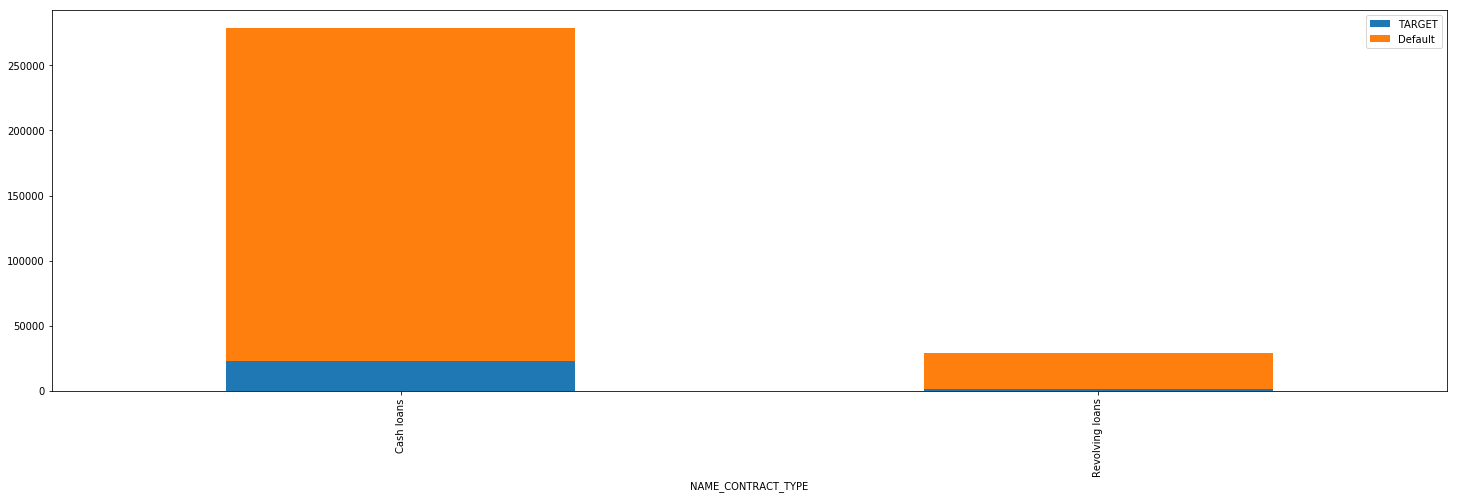

In [13]:
train['Default'] = 1 - train['TARGET']
train.groupby('NAME_CONTRACT_TYPE').agg('sum')[['TARGET', 'Default']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

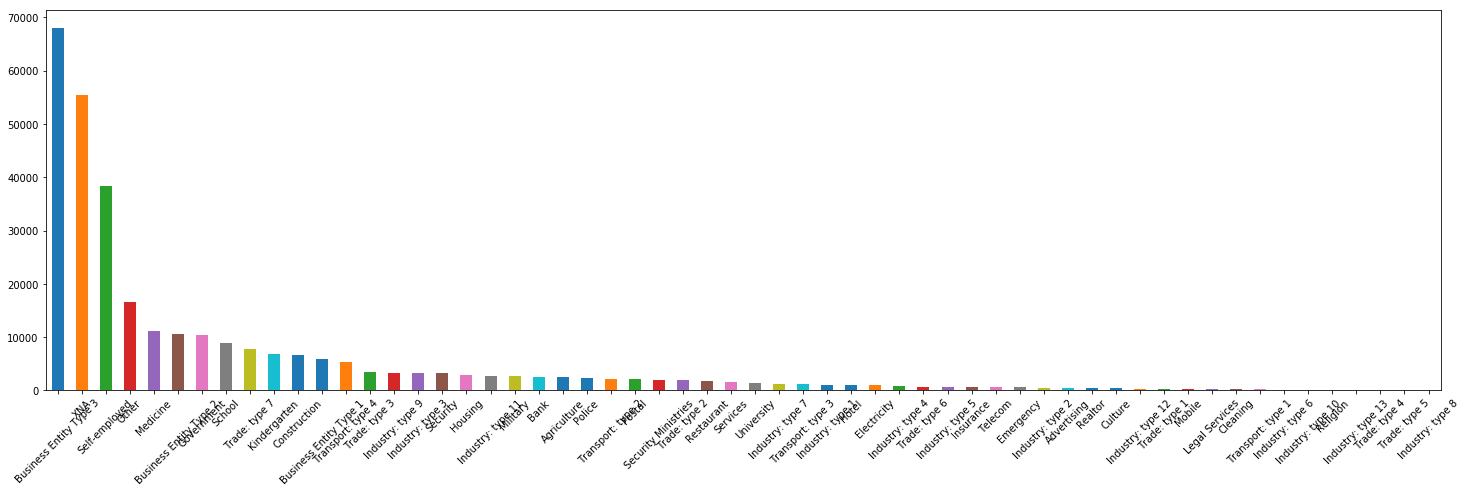

In [14]:
graph = train["ORGANIZATION_TYPE"].value_counts()
plt.figure(figsize=(25, 7))
graph.plot(kind='bar')
plt.xticks(rotation=45)

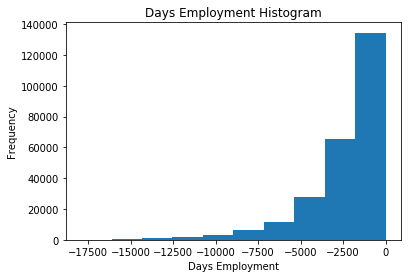

In [15]:
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

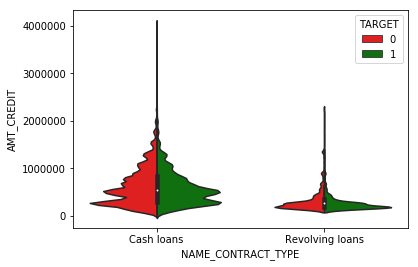

In [16]:
sns.violinplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', 
               hue='TARGET', data=train, 
               split=True,
               palette={0: "r", 1: "g"}, dropna= True
              );

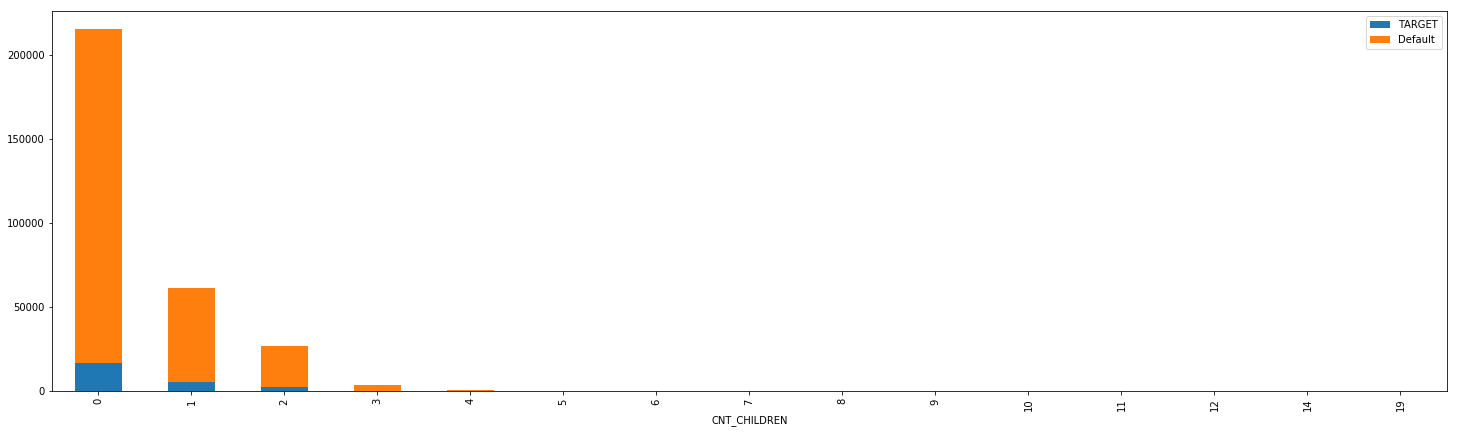

In [17]:
train['Default'] = 1 - train['TARGET']
train.groupby('CNT_CHILDREN').agg('sum')[['TARGET', 'Default']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True);

In [18]:
train.groupby('FLAG_OWN_REALTY').agg('mean')[["TARGET", "Default"]]

,TARGET,Default
FLAG_OWN_REALTY,,
N,0.083249,0.916751
Y,0.079616,0.920384


In [19]:
correlations = train.corr()['TARGET'].sort_values()

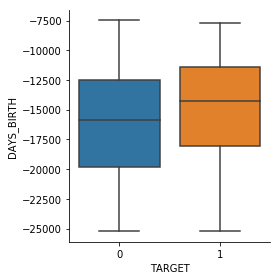

In [20]:
sns.factorplot(kind='box',        
               y='DAYS_BIRTH',   
               x='TARGET',       
               data=train,      
               legend_out=False)  

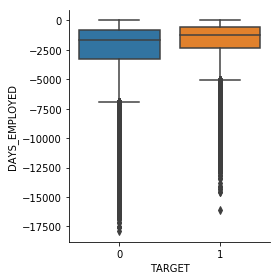

In [21]:
sns.factorplot(kind='box',        
               y='DAYS_EMPLOYED',   
               x='TARGET',       
               data=train,      
               legend_out=False)  

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


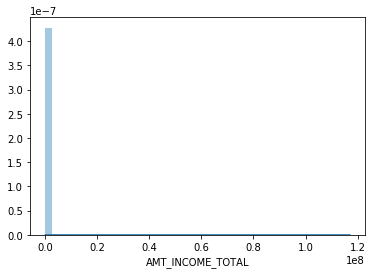

In [22]:
sns.distplot(train["AMT_INCOME_TOTAL"] )

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


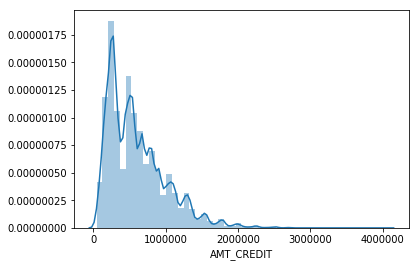

In [23]:

sns.distplot(train["AMT_CREDIT"] )

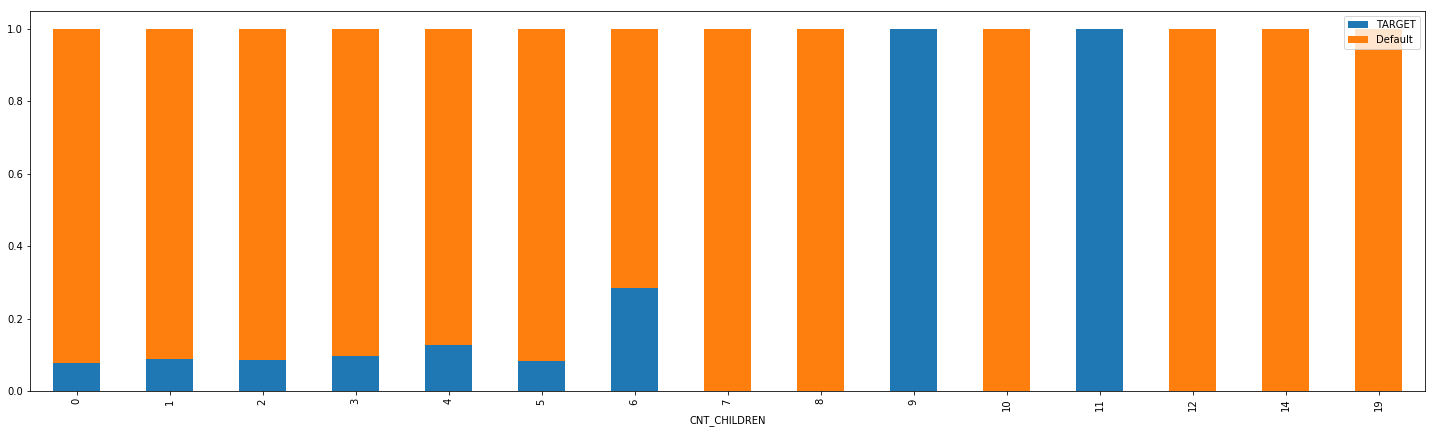

In [24]:
train['Default'] = 1 - train['TARGET']
train.groupby('CNT_CHILDREN').agg('mean')[['TARGET', 'Default']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True);


In [25]:
corre = train.corr()['TARGET'].sort_values()
print(correlations.tail(20))
print(correlations.head(20))


CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
Default                      -1.000000
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
FLOORSMAX_AVG  

In [26]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
import os

In [27]:
categorical = [a for a in train.columns if train[a].dtype == 'object']
train2 = train
train2.fillna(-999, inplace = True)
for column in categorical:
    train2 = pd.get_dummies(data=train2, columns=[column])


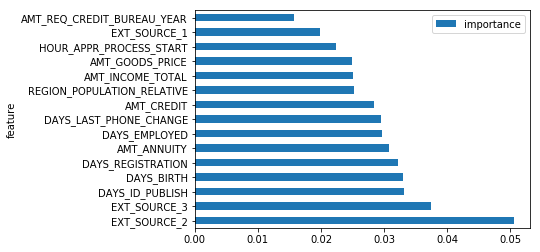

In [28]:
y= train2['TARGET']
X=train2[[e for e in (list(train2.columns.values)) if e not in ('TARGET', 'SK_ID_CURR', 'Default')]]
model = RandomForestClassifier()
model.fit(X, y)
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = model.feature_importances_
features.set_index('feature', inplace=True)
features.sort_values(by=['importance'], ascending=False, inplace=True)
features.head(15).plot(kind='barh')